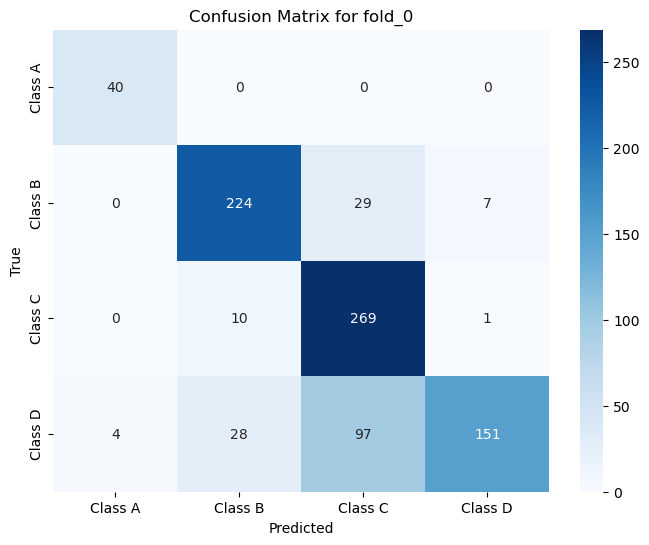

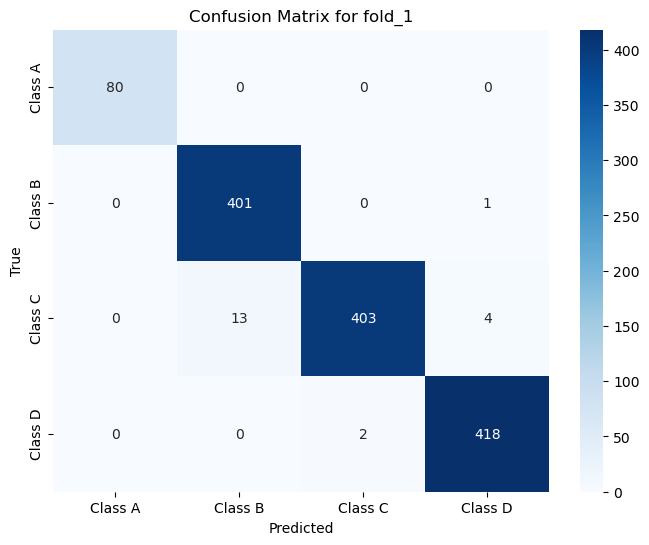

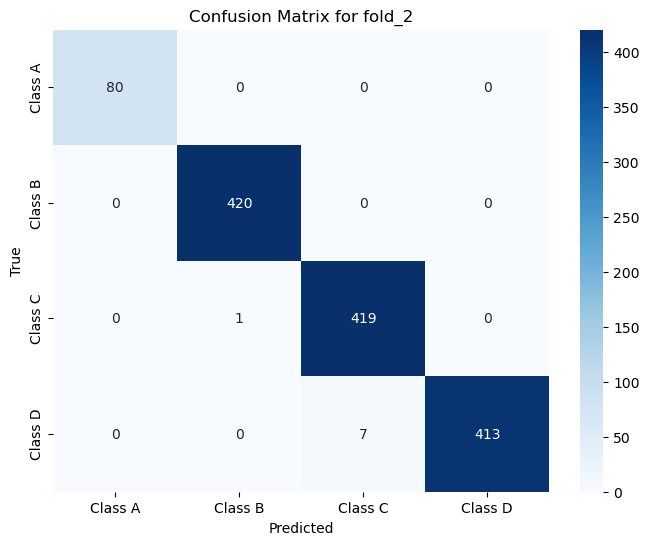

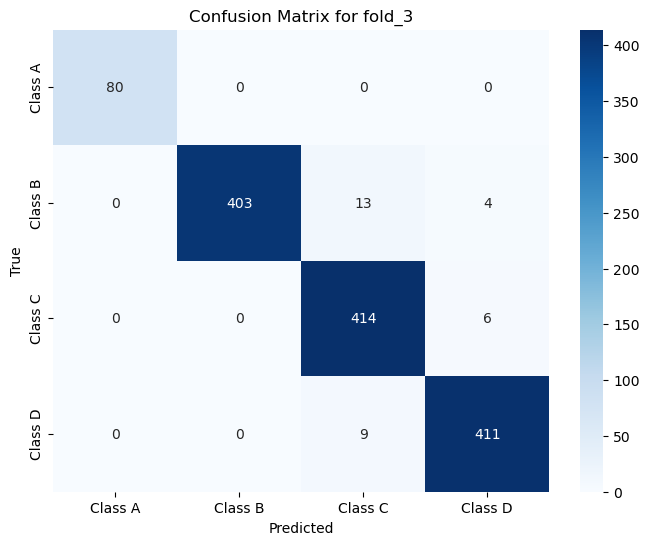

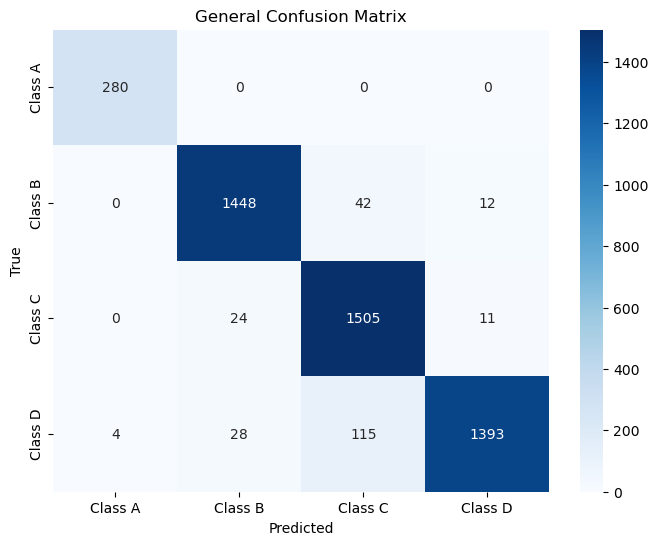

In [33]:
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the results directory
results_dir = '../results/CWRU Load Division IMGNET Pretrain'

# Define the mapping from class indices to class names
class_mapping = {
    0: 'Class A',
    1: 'Class B',
    2: 'Class C',
    3: "Class D"
}

# Initialize lists to store all predictions and true labels
all_preds = []
all_true = []

# Iterate over each fold
fold_dirs = sorted([d for d in os.listdir(results_dir) if d.startswith('fold')])
for fold_dir in fold_dirs:
    fold_path = os.path.join(results_dir, fold_dir)
    preds_true_file = os.path.join(fold_path, 'preds_true.csv')
    
    # Read the predictions and true labels
    df = pd.read_csv(preds_true_file)
    preds = df['preds']
    true = df['true']
    
    # Append to the overall lists
    all_preds.extend(preds)
    all_true.extend(true)
    
    # Compute the confusion matrix for this fold
    cm = confusion_matrix(true, preds)
    
    # Plot the confusion matrix for this fold
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_mapping.values(), 
                yticklabels=class_mapping.values())
    plt.title(f'Confusion Matrix for {fold_dir}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Compute the general confusion matrix across all folds
general_cm = confusion_matrix(all_true, all_preds)

# Plot the general confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(general_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_mapping.values(), 
            yticklabels=class_mapping.values())
plt.title('General Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [34]:
# Initialize a dictionary to store the sum of metrics across all folds
metrics_sum = {
    'test_loss': 0.0,
    'recall_score': 0.0,
    'precision_score': 0.0,
    'f1_score': 0.0,
    'accuracy_score': 0.0
}

# Initialize a counter for the number of folds
num_folds = 0

# Iterate over each fold
fold_dirs = sorted([d for d in os.listdir(results_dir) if d.startswith('fold')])
for fold_dir in fold_dirs:
    fold_path = os.path.join(results_dir, fold_dir)
    test_results_file = os.path.join(fold_path, 'test_results.csv')
    
    # Read the test results for this fold
    df = pd.read_csv(test_results_file)
    
    # Add the metrics to the sum
    metrics_sum['test_loss'] += df['test_loss'].values[0]
    metrics_sum['recall_score'] += df['recall_score'].values[0]
    metrics_sum['precision_score'] += df['precision_score'].values[0]
    metrics_sum['f1_score'] += df['f1_score'].values[0]
    metrics_sum['accuracy_score'] += df['accuracy_score'].values[0]
    
    # Increment the fold counter
    num_folds += 1

# Calculate the mean of each metric
metrics_mean = {key: value / num_folds for key, value in metrics_sum.items()}

# Print the mean of each metric
print("Mean metrics across all folds:")
for metric, mean_value in metrics_mean.items():
    print(f"{metric}: {mean_value:.6f}")

Mean metrics across all folds:
test_loss: 0.204894
recall_score: 0.937592
precision_score: 0.946914
f1_score: 0.947005
accuracy_score: 0.951161


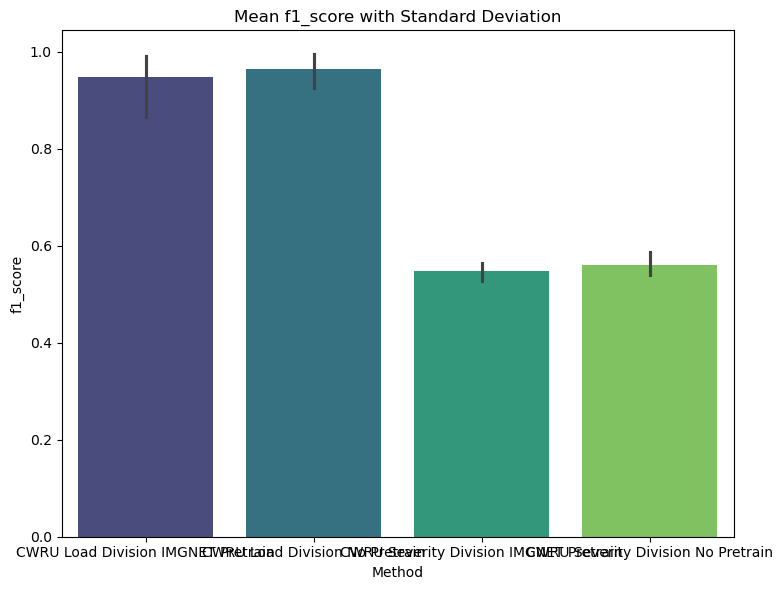

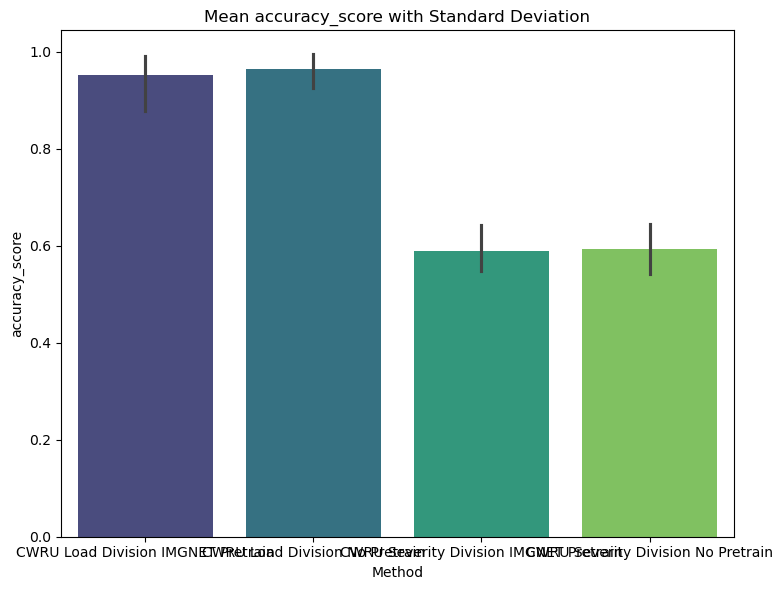

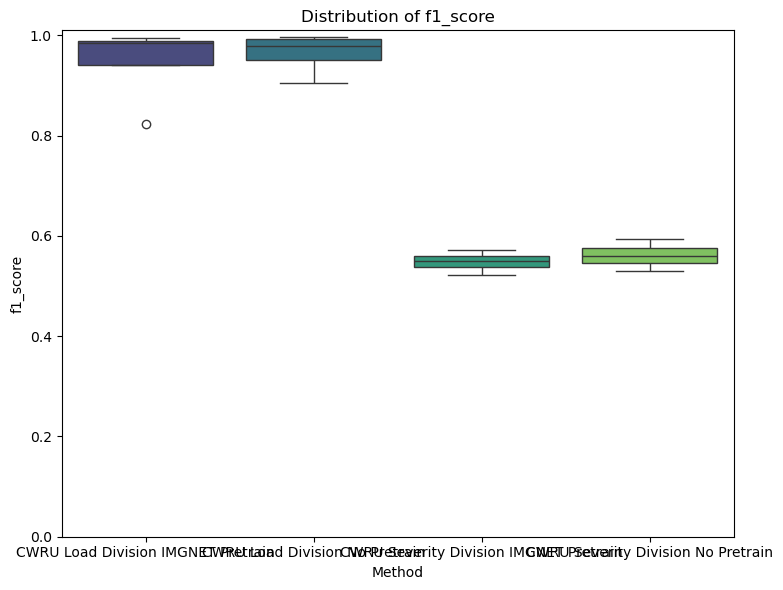

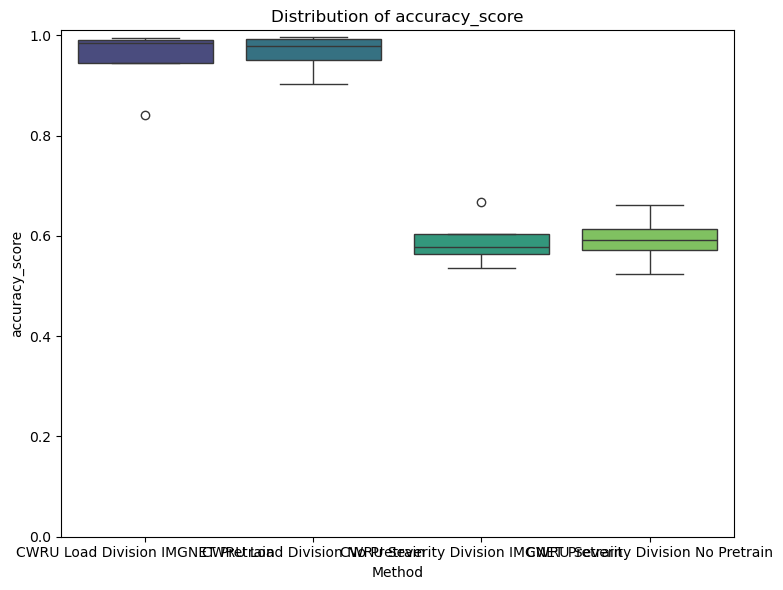

/tmp/ipykernel_313800/3616584315.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_table = summary_table.append({
/tmp/ipykernel_313800/3616584315.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_table = summary_table.append({
/tmp/ipykernel_313800/3616584315.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_table = summary_table.append({
/tmp/ipykernel_313800/3616584315.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_table = summary_table.append({
/tmp/ipykernel_313800/3616584315.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results_dir = '../results'

# Define the metrics to analyze
metrics = ['f1_score', 'accuracy_score']

# Initialize a dictionary to store metrics for each method
method_metrics = {}

# Iterate over each method folder
method_folders = [d for d in os.listdir(results_dir) if os.path.isdir(os.path.join(results_dir, d))]
for method in method_folders:
    method_path = os.path.join(results_dir, method)
    
    # Initialize a list to store metrics for all folds of this method
    method_metrics[method] = {metric: [] for metric in metrics}
    
    # Iterate over each fold in the method folder
    fold_dirs = sorted([d for d in os.listdir(method_path) if d.startswith('fold')])
    for fold_dir in fold_dirs:
        fold_path = os.path.join(method_path, fold_dir)
        test_results_file = os.path.join(fold_path, 'test_results.csv')
        
        # Read the test results for this fold
        df = pd.read_csv(test_results_file)
        
        # Append metrics to the method's list
        for metric in metrics:
            method_metrics[method][metric].append(df[metric].values[0])

# Convert the metrics into a DataFrame for easier plotting
data = []
for method, metrics_dict in method_metrics.items():
    for metric, values in metrics_dict.items():
        for value in values:
            data.append({'Method': method, 'Metric': metric, 'Value': value})
df = pd.DataFrame(data)

# Bar Plot: Mean of each metric for each method (one chart at a time)
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=df[df['Metric'] == metric], x='Method', y='Value', palette='viridis', hue='Method')
    plt.title(f'Mean {metric} with Standard Deviation')
    plt.xlabel('Method')
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()

# Box Plot: Distribution of each metric for each method (one chart at a time)
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[df['Metric'] == metric], x='Method', y='Value', palette='viridis', hue='Method')
    plt.title(f'Distribution of {metric}')
    plt.xlabel('Method')
    plt.ylabel(metric)
    plt.tight_layout()
    plt.ylim(0, 1.01)
    plt.show()

# Create a summary table for each method
summary_table = pd.DataFrame(columns=['Method', 'Metric', 'Mean', 'Std'])

for method in method_metrics:
    for metric in metrics:
        mean_value = pd.Series(method_metrics[method][metric]).mean()
        std_value = pd.Series(method_metrics[method][metric]).std()
        summary_table = summary_table.append({
            'Method': method,
            'Metric': metric,
            'Mean': mean_value,
            'Std': std_value
        }, ignore_index=True)

# Pivot the table for better readability
summary_table_pivot = summary_table.pivot(index='Method', columns='Metric', values=['Mean', 'Std'])

In [36]:
summary_table_pivot

Mean            \
Metric                                 accuracy_score  f1_score   
Method                                                            
CWRU Load Division IMGNET Pretrain           0.951161  0.947005   
CWRU Load Division No Pretrain               0.964805  0.964925   
CWRU Severity Division IMGNET Pretrain       0.589877  0.548201   
CWRU Severity Division No Pretrain           0.592919  0.560960   

                                                  Std            
Metric                                 accuracy_score  f1_score  
Method                                                           
CWRU Load Division IMGNET Pretrain           0.074081  0.082278  
CWRU Load Division No Pretrain               0.042692  0.042491  
CWRU Severity Division IMGNET Pretrain       0.054904  0.020884  
CWRU Severity Division No Pretrain           0.056871  0.027297